In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Creating a Table from Scratch ##

In [2]:
Table()

In [3]:
streets = make_array('Bancroft', 'Durant', 'Channing', 'Haste')

In [4]:
streets

array(['Bancroft', 'Durant', 'Channing', 'Haste'], dtype='<U8')

In [5]:
Table().with_column('Street name', streets)

Street name
Bancroft
Durant
Channing
Haste


In [6]:
southside = Table().with_column('Street name', streets)

In [7]:
# creates a new table with the specified column
southside.with_column('Blocks away from campus', np.arange(4))

Street name,Blocks away from campus
Bancroft,0
Durant,1
Channing,2
Haste,3


In [8]:
southside

Street name
Bancroft
Durant
Channing
Haste


In [9]:
southside = southside.with_column('Blocks away from campus', np.arange(4))

In [10]:
southside

Street name,Blocks away from campus
Bancroft,0
Durant,1
Channing,2
Haste,3


## Reading a Table from a File  ##

In [11]:
minard = Table.read_table('minard.csv')

In [12]:
minard

Longitude,Latitude,City,Direction,Survivors
32,54.8,Smolensk,Advance,145000
33.2,54.9,Dorogobouge,Advance,140000
34.4,55.5,Chjat,Advance,127100
37.6,55.8,Moscou,Advance,100000
34.3,55.2,Wixma,Retreat,55000
32,54.6,Smolensk,Retreat,24000
30.4,54.4,Orscha,Retreat,20000
26.8,54.3,Moiodexno,Retreat,12000


## Selecting data in a column ##

In [13]:
minard.select('Survivors')

Survivors
145000
140000
127100
100000
55000
24000
20000
12000


In [14]:
minard.column('Survivors')

array([145000, 140000, 127100, 100000,  55000,  24000,  20000,  12000])

In [15]:
minard.column('Survivors').item(0)

145000

## Extending a table with a new column ##

In [16]:
initial_count = minard.column('Survivors').item(0)

In [17]:
proportion_surviving = minard.column('Survivors')/initial_count

In [18]:
minard = minard.with_column('Percent surviving', proportion_surviving)

In [19]:
minard

Longitude,Latitude,City,Direction,Survivors,Percent surviving
32,54.8,Smolensk,Advance,145000,1
33.2,54.9,Dorogobouge,Advance,140000,0.965517
34.4,55.5,Chjat,Advance,127100,0.876552
37.6,55.8,Moscou,Advance,100000,0.689655
34.3,55.2,Wixma,Retreat,55000,0.37931
32,54.6,Smolensk,Retreat,24000,0.165517
30.4,54.4,Orscha,Retreat,20000,0.137931
26.8,54.3,Moiodexno,Retreat,12000,0.0827586


In [20]:
minard.set_format('Percent surviving', PercentFormatter)

Longitude,Latitude,City,Direction,Survivors,Percent surviving
32,54.8,Smolensk,Advance,145000,100.00%
33.2,54.9,Dorogobouge,Advance,140000,96.55%
34.4,55.5,Chjat,Advance,127100,87.66%
37.6,55.8,Moscou,Advance,100000,68.97%
34.3,55.2,Wixma,Retreat,55000,37.93%
32,54.6,Smolensk,Retreat,24000,16.55%
30.4,54.4,Orscha,Retreat,20000,13.79%
26.8,54.3,Moiodexno,Retreat,12000,8.28%


## Working with Columns ##

In [21]:
movies = Table.read_table('movies_by_year_with_ticket_price.csv')

In [22]:
movies.show()

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie
2015,8.43,11128.5,702,Star Wars: The Force Awakens
2014,8.17,10360.8,702,American Sniper
2013,8.13,10923.6,688,Catching Fire
2012,7.96,10837.4,667,The Avengers
2011,7.93,10174.3,602,Harry Potter / Deathly Hallows (P2)
2010,7.89,10565.6,536,Toy Story 3
2009,7.5,10595.5,521,Avatar
2008,7.18,9630.7,608,The Dark Knight
2007,6.88,9663.8,631,Spider-Man 3
2006,6.55,9209.5,608,Dead Man's Chest


In [23]:
movies.labels

('Year', 'Average Ticket Price', 'Total Gross', 'Number of Movies', '#1 Movie')

In [24]:
movies.num_rows

36

In [25]:
number_of_tix = movies.column('Total Gross') * (10 ** 6) / movies.column('Average Ticket Price')

In [26]:
movies = movies.with_column('Number of tickets', number_of_tix)

In [27]:
movies

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Number of tickets
2015,8.43,11128.5,702,Star Wars: The Force Awakens,1.32011e+09
2014,8.17,10360.8,702,American Sniper,1.26815e+09
2013,8.13,10923.6,688,Catching Fire,1.34362e+09
2012,7.96,10837.4,667,The Avengers,1.36148e+09
2011,7.93,10174.3,602,Harry Potter / Deathly Hallows (P2),1.28301e+09
2010,7.89,10565.6,536,Toy Story 3,1.33911e+09
2009,7.5,10595.5,521,Avatar,1.41273e+09
2008,7.18,9630.7,608,The Dark Knight,1.34132e+09
2007,6.88,9663.8,631,Spider-Man 3,1.40462e+09
2006,6.55,9209.5,608,Dead Man's Chest,1.40603e+09


In [28]:
movies.set_format(5, NumberFormatter)

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Number of tickets
2015,8.43,11128.5,702,Star Wars: The Force Awakens,"1,320,106,761.57"
2014,8.17,10360.8,702,American Sniper,"1,268,151,774.79"
2013,8.13,10923.6,688,Catching Fire,"1,343,616,236.16"
2012,7.96,10837.4,667,The Avengers,"1,361,482,412.06"
2011,7.93,10174.3,602,Harry Potter / Deathly Hallows (P2),"1,283,013,871.37"
2010,7.89,10565.6,536,Toy Story 3,"1,339,112,801.01"
2009,7.5,10595.5,521,Avatar,"1,412,733,333.33"
2008,7.18,9630.7,608,The Dark Knight,"1,341,323,119.78"
2007,6.88,9663.8,631,Spider-Man 3,"1,404,622,093.02"
2006,6.55,9209.5,608,Dead Man's Chest,"1,406,030,534.35"


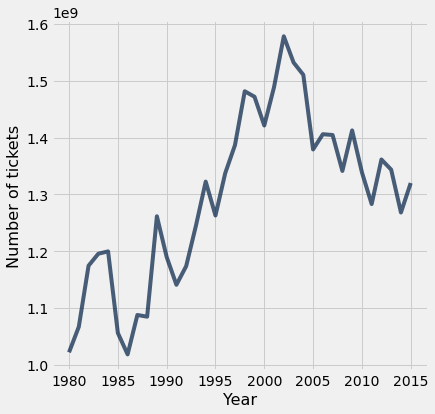

In [29]:
movies.plot('Year', 'Number of tickets')

## Rows ##

In [30]:
movies.where('Year', are.between(2000, 2005))

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Number of tickets
2004,6.21,9380.5,551,Shrek 2,"1,510,547,504.03"
2003,6.03,9239.7,506,Return of the King,"1,532,288,557.21"
2002,5.8,9155,479,Spider-Man,"1,578,448,275.86"
2001,5.65,8412.5,482,Harry Potter / Sorcerer's Stone,"1,488,938,053.10"
2000,5.39,7661,478,The Grinch,"1,421,335,807.05"


In [31]:
movies.where('#1 Movie', are.equal_to('Avatar'))

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Number of tickets
2009,7.5,10595.5,521,Avatar,"1,412,733,333.33"


In [32]:
movies.where('#1 Movie', 'Avatar')

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Number of tickets
2009,7.5,10595.5,521,Avatar,"1,412,733,333.33"


In [33]:
movies.where('#1 Movie', are.containing('Harry Potter'))

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Number of tickets
2011,7.93,10174.3,602,Harry Potter / Deathly Hallows (P2),"1,283,013,871.37"
2001,5.65,8412.5,482,Harry Potter / Sorcerer's Stone,"1,488,938,053.10"


In [34]:
movies.where('Number of Movies', are.below(450))

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Number of tickets
1995,4.35,5493.5,411,Toy Story,"1,262,873,563.22"
1990,4.22,5021.8,410,Home Alone,"1,190,000,000.00"
1982,2.94,3453,428,E.T.,"1,174,489,795.92"
1981,2.78,2966,173,Raiders / Lost Ark,"1,066,906,474.82"
1980,2.69,2749,161,The Empire Strikes Back,"1,021,933,085.50"


In [35]:
movies.where('Year', are.above(2010))

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Number of tickets
2015,8.43,11128.5,702,Star Wars: The Force Awakens,"1,320,106,761.57"
2014,8.17,10360.8,702,American Sniper,"1,268,151,774.79"
2013,8.13,10923.6,688,Catching Fire,"1,343,616,236.16"
2012,7.96,10837.4,667,The Avengers,"1,361,482,412.06"
2011,7.93,10174.3,602,Harry Potter / Deathly Hallows (P2),"1,283,013,871.37"


In [36]:
movies.take(3)

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Number of tickets
2012,7.96,10837.4,667,The Avengers,"1,361,482,412.06"


In [37]:
movies.take(np.arange(4))

Year,Average Ticket Price,Total Gross,Number of Movies,#1 Movie,Number of tickets
2015,8.43,11128.5,702,Star Wars: The Force Awakens,"1,320,106,761.57"
2014,8.17,10360.8,702,American Sniper,"1,268,151,774.79"
2013,8.13,10923.6,688,Catching Fire,"1,343,616,236.16"
2012,7.96,10837.4,667,The Avengers,"1,361,482,412.06"
